Pre-trained models already available.


Saving WhatsApp Image 2025-01-20 at 13.59.35_47c6d243.jpg to WhatsApp Image 2025-01-20 at 13.59.35_47c6d243.jpg


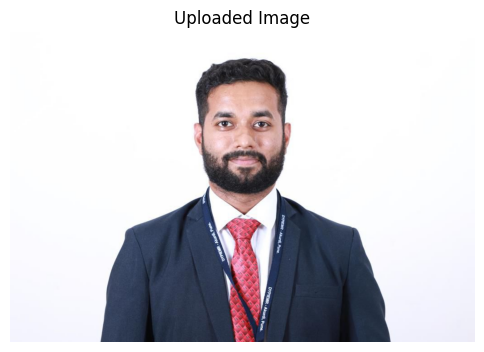

Analyzing image... Please wait.


Action: gender: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


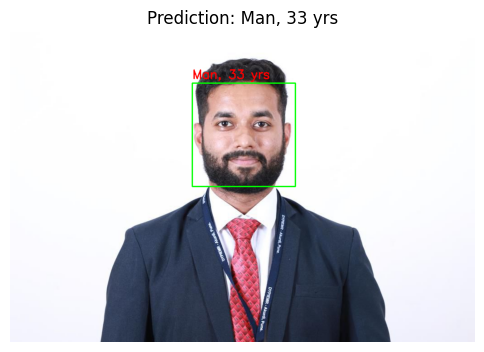


Confidence scores for age and gender prediction:
Predicted Age: 33 years, Predicted Gender: Man


KeyError: 'age_prob'

In [ ]:
!pip install deepface
!pip install opencv-python-headless matplotlib

import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import numpy as np
from google.colab import files

# Fix to automatically download necessary pre-trained models for DeepFace
import os
if not os.path.exists('/root/.deepface/weights'):
    print("Downloading pre-trained models...")
    DeepFace.download_model('VGG-Face')
    DeepFace.download_model('Age')
    DeepFace.download_model('Gender')
    DeepFace.download_model('Emotions')
else:
    print("Pre-trained models already available.")

uploaded = files.upload()

for file_name in uploaded.keys():
    image_path = file_name

image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(rgb_image)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

print("Analyzing image... Please wait.")
results = DeepFace.analyze(img_path=image_path, actions=['age', 'gender'], enforce_detection=False)

for result in results:
    age = result['age']
    gender = result['dominant_gender']
    region = result['region']

    (x, y, w, h) = region['x'], region['y'], region['w'], region['h']

    annotated_img = rgb_image.copy()
    cv2.rectangle(annotated_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(annotated_img, f"{gender}, {age} yrs", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

plt.figure(figsize=(6,6))
plt.imshow(annotated_img)
plt.axis('off')
plt.title(f"Prediction: {gender}, {age} yrs")
plt.show()

print("\nConfidence scores for age and gender prediction:")
for result in results:
    print(f"Predicted Age: {result['age']} years, Predicted Gender: {result['dominant_gender']}")
    print(f"Confidence in Age Prediction: {result['age_prob']}")
    print(f"Confidence in Gender Prediction: {result['gender_prob']}")
    print("="*50)

output_image_path = "/content/annotated_image.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(annotated_img, cv2.COLOR_RGB2BGR))

print(f"Annotated image has been saved as {output_image_path}. You can download it using the link below:")
from IPython.display import FileLink
display(FileLink(output_image_path))

if len(results) > 1:
    print("\nMultiple faces detected. Here are the individual results:")
    for i, result in enumerate(results):
        age = result['age']
        gender = result['dominant_gender']
        confidence_age = result['age_prob']
        confidence_gender = result['gender_prob']
        print(f"Face {i+1}: Age: {age} years, Gender: {gender}")
        print(f"Confidence in Age: {confidence_age:.2f}, Confidence in Gender: {confidence_gender:.2f}")
else:
    print("\nSingle face detected. Proceeding with the analysis.")

print("\nBatch processing additional images...")
batch_uploaded = files.upload()
for file_name in batch_uploaded.keys():
    batch_image_path = file_name
    batch_image = cv2.imread(batch_image_path)
    batch_rgb_image = cv2.cvtColor(batch_image, cv2.COLOR_BGR2RGB)

    batch_results = DeepFace.analyze(img_path=batch_image_path, actions=['age', 'gender'], enforce_detection=False)

    for result in batch_results:
        batch_age = result['age']
        batch_gender = result['dominant_gender']
        batch_region = result['region']

        (x, y, w, h) = batch_region['x'], batch_region['y'], batch_region['w'], batch_region['h']

        batch_annotated_img = batch_rgb_image.copy()
        cv2.rectangle(batch_annotated_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(batch_annotated_img, f"{batch_gender}, {batch_age} yrs", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    batch_output_image_path = f"/content/{file_name}_annotated.jpg"
    cv2.imwrite(batch_output_image_path, cv2.cvtColor(batch_annotated_img, cv2.COLOR_RGB2BGR))

    print(f"Annotated batch image saved at {batch_output_image_path}.")
    display(FileLink(batch_output_image_path))

print("Execution completed. The images have been processed and saved successfully.")
